In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,StratifiedShuffleSplit,StratifiedKFold,RandomizedSearchCV,RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import auc,roc_auc_score, accuracy_score, confusion_matrix, f1_score, precision_score, \
recall_score, matthews_corrcoef, precision_recall_curve
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import PolynomialFeatures,LabelEncoder
from sklearn.feature_selection import VarianceThreshold
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score, precision_score, \
recall_score, matthews_corrcoef, precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import lightgbm as lgb
from catboost import CatBoostClassifier

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', 100)

### Reading the train & test data

In [4]:
train_original=pd.read_csv('/kaggle/input/dont-overfit-old-data/train.csv')
test_original=pd.read_csv('/kaggle/input/dontoverfitolddata/test.csv')

In [5]:
train=train_original.copy()
test=test_original.copy()

In [6]:
train.shape,test.shape

((250, 302), (19750, 301))

In [7]:
train.head()

,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,...,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,-0.912,-0.107,0.305,0.102,0.826,0.417,0.177,-0.673,-0.503,1.864,0.410,-1.927,0.102,-0.931,1.763,1.449,-1.097,-0.686,-0.250,-1.859,1.125,1.009,-2.296,0.385,-0.876,1.528,-0.144,-1.078,-0.403,0.005,1.405,-0.044,-0.458,0.579,2.929,0.833,0.761,0.737,...,-0.692,-0.514,0.754,-1.892,0.203,2.174,-0.755,-1.053,-0.516,-1.109,-0.681,1.250,-0.565,-1.318,-0.923,0.075,-0.704,2.457,0.771,-0.460,0.569,-1.320,-1.516,-2.145,-1.120,0.156,0.820,-1.049,-1.125,0.484,0.617,1.253,1.248,0.504,-0.802,-0.896,-1.793,-0.284,-0.601,0.569,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,2.907,1.085,2.144,1.540,0.584,1.133,1.098,-0.237,-0.498,0.283,-1.100,-0.417,1.382,-0.515,-1.519,0.619,-0.128,0.866,-0.540,1.238,-0.227,0.269,-0.390,-2.721,1.659,0.106,-0.121,1.719,0.411,-0.303,-0.307,0.380,0.503,-1.320,0.339,-1.102,-0.947,0.267,...,-0.731,-1.234,0.960,1.470,0.652,0.483,-2.015,-1.258,0.630,1.158,0.971,-1.489,0.530,0.917,-0.094,-1.407,0.887,-0.104,-0.583,1.267,-1.667,-2.771,-0.516,1.312,0.491,0.932,2.064,0.422,1.215,2.012,0.043,-0.307,-0.059,1.121,1.333,0.211,1.753,0.053,1.274,-0.612,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,0.137,0.183,0.459,0.478,-0.425,0.352,1.095,0.300,-1.044,0.270,-1.038,0.144,-1.658,-0.946,0.633,-0.772,1.786,0.136,-0.103,-1.223,2.273,0.055,-2.032,-0.452,0.064,0.924,-0.692,-0.067,-0.917,1.896,-0.152,1.920,-1.244,-1.704,0.167,1.088,0.068,0.972,-1.554,0.218,...,-0.945,-2.269,0.678,0.468,-0.405,1.059,0.483,2.470,1.459,-0.511,-0.540,-0.299,1.074,-0.748,1.086,-0.766,-0.931,0.432,1.345,-0.491,-1.602,-0.727,0.346,0.780,-0.527,-1.122,-0.208,-0.730,-0.302,2.535,-1.045,0.037,0.020,1.373,0.456,-0.277,1.381,1.843,0.749,0.202,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,0.503,0.274,0.335,-1.148,0.067,-1.010,1.048,-1.442,0.210,0.836,-0.326,0.716,-0.764,0.248,-1.308,2.127,0.365,0.296,-0.808,1.854,0.118,0.380,0.999,-1.171,2.798,0.394,-1.048,1.078,0.401,-0.486,-0.732,-2.241,-0.193,0.336,0.009,0.423,1.070,-0.861,1.320,-0.976,...,0.795,-0.056,-0.497,0.814,-1.114,-0.800,1.495,-0.591,0.530,-0.528,-0.083,-0.831,1.251,-0.206,-0.933,-1.215,0.281,0.512,-0.424,0.769,0.223,-0.710,2.725,0.176,0.845,-1.226,1.527,-1.701,0.597,0.150,1.864,0.322,-0.214,1.282,0.408,-0.910,1.020,-0.299,-1.574,-1.618,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,-0.012,2.198,0.190,0.453,0.494,1.478,-1.412,0.270,-1.312,-0.322,-0.688,-0.198,-0.285,1.042,-0.315,-0.478,0.024,-0.190,1.656,-0.469,-1.437,-0.581,-0.308,-0.837,-1.739,0.037,0.336,-1.102,2.371,0.554,1.173,-0.122,1.528,-1.220,2.054,-0.318,-0.445,0.344,0.161,0.830,...,-0.462,-0.767,-0.191,0.169,1.273,-0.160,0.393,0.231,-0.906,0.348,-1.050,-0.347,0.904,-1.324,-0.849,3.432,0.222,0.416,0.174,-1.517,-0.337,0.055,-0.464,0.014,-1.073,0.325,-0.523,-0.692,0.190,-0.883,-1.830,1.408,2.319,1.704,-0.723,1.014,0.064,0.096,-0.775,1.845,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [8]:
train['target'].value_counts()/train.shape[0]

1.0    0.64
0.0    0.36
Name: target, dtype: float64

In [9]:
print(train.dtypes)
print('\n')
print(sum(train.dtypes=='object'))#so all are numeric variables

id          int64
target    float64
0         float64
1         float64
2         float64
           ...   
295       float64
296       float64
297       float64
298       float64
299       float64
Length: 302, dtype: object


0


In [10]:
sum(train.isnull().sum()>0)#no missing values in train aswell as Test

0

In [11]:
#lets find the descriptive stats of each column
train.describe()#many variables look very similar
#all columns are of similar scale with mean around 0 and sd around 1.
# Also since the variance of the columns are almost similar, this means running PCA wont help much

,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,...,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,0.640000,0.023292,-0.026872,0.167404,0.001904,0.001588,-0.007304,0.032052,0.078412,-0.036920,0.035448,-0.005032,0.110248,0.019808,-0.001108,-0.016280,-0.039644,0.017260,-0.106856,0.036184,-0.043296,-0.110832,0.072680,0.017296,-0.030728,-0.128252,0.154736,0.083408,0.039552,-0.091784,0.054636,-0.048288,-0.017296,0.007708,-0.134460,0.093852,-0.020588,-0.002492,-0.141400,-0.061500,-0.043576,0.009136,-0.056824,-0.025968,0.046644,-0.029320,0.048420,-0.030300,-0.054828,...,0.037056,0.092040,0.023136,-0.078856,-0.026748,-0.019820,-0.025568,-0.033840,-0.037772,0.042652,0.005780,-0.102304,-0.013796,0.089384,0.036368,0.016276,-0.069448,-0.113236,0.035696,0.034484,-0.066236,-0.057988,0.091556,-0.029896,0.115648,0.007372,0.033552,0.090524,0.001576,-0.007784,0.043184,0.082696,0.098476,0.055356,0.111708,-0.015688,0.035992,0.026452,-0.059152,0.077272,0.044652,0.126344,0.018436,-0.012092,-0.065720,-0.106112,0.046472,0.006452,0.009372,-0.128952
std,72.312977,0.480963,0.998354,1.009314,1.021709,1.011751,1.035411,0.955700,1.006657,0.939731,0.963688,1.019689,1.085089,1.036265,1.050041,1.024305,0.926789,0.955915,1.025655,1.012777,0.945099,1.055935,1.003178,1.039556,0.988482,0.945902,0.997026,0.997894,1.040371,0.922270,1.047282,1.041432,1.010971,0.992464,0.986350,1.015563,1.117898,0.958191,0.948855,1.042429,1.024573,0.996280,0.993367,0.977879,1.035532,0.991244,0.921214,0.973115,0.998897,1.038618,...,1.066471,1.002997,1.029485,1.044701,1.050109,0.973342,1.008486,0.986381,0.990875,1.060948,0.994761,1.094494,1.026025,0.963489,1.026373,1.008207,0.989451,1.002857,0.944743,1.023709,0.985451,0.951879,1.027877,0.966882,1.037173,1.004543,1.006219,1.037119,1.024067,1.056086,1.012516,1.068741,0.934163,0.988100,1.043230,1.010720,1.058982,0.896318,1.113760,0.972530,1.011416,0.972567,0.954229,0.960630,1.057414,1.038389,0.967661,0.998984,1.008099,0.971219
min,0.000000,0.000000,-2.319000,-2.931000,-2.477000,-2.359000,-2.566000,-2.845000,-2.976000,-3.444000,-2.768000,-2.361000,-3.302000,-2.851000,-2.681000,-2.596000,-3.275000,-3.512000,-2.476000,-3.619000,-2.428000,-3.229000,-3.024000,-2.775000,-2.962000,-2.490000,-3.107000,-2.943000,-2.933000,-2.942000,-2.957000,-2.911000,-2.568000,-2.649000,-3.031000,-2.913000,-3.265000,-2.372000,-3.037000,-3.340000,-2.699000,-3.398000,-2.717000,-2.698000,-2.728000,-2.838000,-2.741000,-2.335000,-2.946000,-2.815000,...,-3.186000,-2.269000,-2.422000,-2.865000,-3.629000,-2.601000,-2.731000,-3.005000,-2.773000,-2.510000,-2.512000,-2.873000,-2.549000,-2.721000,-2.578000,-2.239000,-3.046000

Text(0.5, 1.0, 'MEAN of all columns')

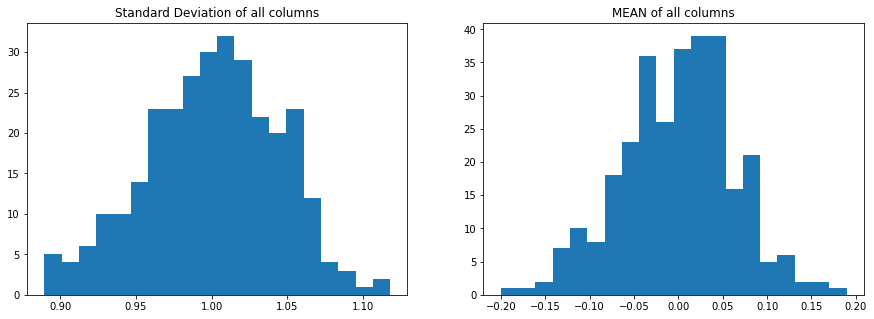

In [12]:
#lets plot the variance of each column
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(train.drop(['id','target'],axis=1).std(),bins=20);
plt.title('Standard Deviation of all columns')
plt.subplot(1, 2, 2)
plt.hist(train.drop(['id','target'],axis=1).mean(),bins=20);
plt.title('MEAN of all columns')

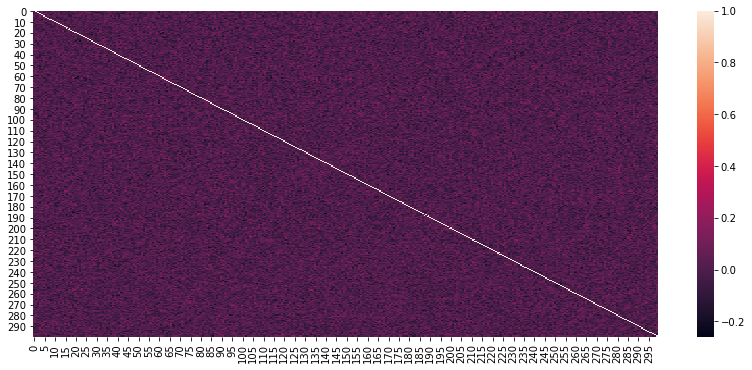

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(14,6))
sns.heatmap(train.drop(['id','target'],axis=1).corr());#not very helpful

In [14]:
corrs = train.corr().abs().unstack().sort_values(kind="quicksort").reset_index()
corrs = corrs[corrs['level_0'] != corrs['level_1']]
corrs.tail(10)
#we see here that the max co-relation between the predictors is below 0.33. 
#So there is no multi-collinearity that can help us drop any feature
#There are even no feature that is highly co-related with the target variable
#we can delete some features that ave very low co-relation with target

,level_0,level_1,0
90892,22,28,0.246062
90893,28,22,0.246062
90894,193,101,0.252825
90895,101,193,0.252825
90896,75,32,0.259315
90897,32,75,0.259315
90898,target,65,0.293846
90899,65,target,0.293846
90900,33,target,0.373608
90901,target,33,0.373608


In [15]:
corrs.head(10)

,level_0,level_1,0
0,129,238,2.701642e-07
1,238,129,2.701642e-07
2,184,158,1.113105e-06
3,158,184,1.113105e-06
4,295,190,2.245656e-06
5,190,295,2.245656e-06
6,174,218,5.150286e-06
7,218,174,5.150286e-06
8,137,86,5.566789e-06
9,86,137,5.566789e-06


In [16]:
def printScore(pred, label):
    result={}
    result['auc'] = roc_auc_score(label, pred)
    #result['accuracy'] = accuracy_score(label, pred)
    #result['precision'] = precision_score(label, pred)
    #result['recall'] = recall_score(label, pred)
    #result['f1'] = f1_score(label, pred) 
    #result['confusion'] = confusion_matrix(label, pred)
    #precision_c, recall_c, _ = precision_recall_curve(label, pred)
    #result['pr_auc_score'] = auc(recall_c, precision_c)
    #result['Gini']=2*result['auc']-1
    return result

In [17]:
class Modelling():
    def __init__(self,X,y,test_X,skf,N):
        self.X=X
        self.y=y
        self.test_X=test_X
        self.skf=skf
        self.N=N
     
    def Single_Model(self,clf): #for all other Models
        stacker_train = np.zeros((self.X.shape[0], 1))
        stacker_test  = np.zeros(self.test_X.shape[0]) 
        save_gini=[]
        for index, (trn_idx,val_idx) in enumerate(self.skf.split(self.X,self.y)):
            trn_x, val_x = self.X[trn_idx], self.X[val_idx]
            trn_y, val_y = self.y[trn_idx], self.y[val_idx]
            print('Train model in fold {}'.format(index+1))           
            clf.fit(trn_x,trn_y)
            #non_zero=(clf.coef_ != 0).sum()
            #print('Variables with Non Zero Co-efficients {}'.format(non_zero))
            val_pred = clf.predict_proba(val_x)[:,1]
            stacker_train[val_idx,0]=val_pred
            val_auc=printScore(val_pred,val_y)['auc']
            save_gini.append(np.round(val_auc,2))
            #val_gini=printScore(val_pred,val_y)['Gini']
            print('fold {} AUC score on VAL is {:.6f}'.format(index+1, val_auc))
            #for test
            prob_test= clf.predict_proba(self.test_X)[:,1]
            stacker_test+=(prob_test/self.N)
        #evaluate for entire train data (oof)
        train_auc=printScore(stacker_train,self.y)['auc']
       # train_gini=printScore(stacker_train,self.y)['Gini']
        print('All CV score on valid are {} and MEAN CV score is AUC: {} with sd {}'.format(save_gini,np.mean(save_gini),np.std(save_gini)))
        print("CV score on TRAIN (OOF) is AUC: {}".format(train_auc))   
        return stacker_test,stacker_train        
        
        
        
    def SingleRF_oof(self,params):
        clf_rf=RandomForestClassifier(**rf_params,class_weight='balanced')
        save_gini=[]
        stacker_train = np.zeros((self.X.shape[0], 1))
        stacker_test  = np.zeros(self.test_X.shape[0])
        for index, (trn_idx,val_idx) in enumerate(self.skf.split(self.X,self.y)):
            trn_x, val_x = self.X[trn_idx], self.X[val_idx]
            trn_y, val_y = self.y[trn_idx], self.y[val_idx]
            print('Train model in fold {}'.format(index+1))         
            clf_rf.fit(trn_x,trn_y)
            val_pred = clf_rf.predict_proba(val_x)[:,1]
            stacker_train[val_idx,0]=val_pred
            val_auc=printScore(val_pred,val_y)['auc']
            save_gini.append(np.round(val_auc,2))
            #val_gini=printScore(val_pred,val_y)['Gini']
            print('fold {} AUC score on VAL is {:.6f}'.format(index+1, val_auc))
            #for test
            prob_test= clf_rf.predict_proba(self.test_X)[:,1]
            stacker_test+=(prob_test/self.N)
        #evaluate for entire train data (oof)
        train_auc=printScore(stacker_train,self.y)['auc']
        print('All CV score on valid are {} and MEAN CV score is AUC: {} with sd {}'.format(save_gini,np.mean(save_gini),np.std(save_gini)))
        print("CV score on TRAIN (OOF) is AUC: {}".format(train_auc)) 
        return stacker_test,stacker_train

    
    def SingleXGB_oof(self,params,num_boost_round):
        save_gini=[]
        stacker_train = np.zeros((self.X.shape[0], 1))
        stacker_test=np.zeros(self.test_X.shape[0])
        dtest=xgb.DMatrix(self.test_X)
        for index, (trn_idx,val_idx) in enumerate(self.skf.split(self.X,self.y)):
            trn_x, val_x = self.X[trn_idx], self.X[val_idx]
            trn_y, val_y = self.y[trn_idx], self.y[val_idx]
            dtrn = xgb.DMatrix(data=trn_x, label=trn_y)
            dval = xgb.DMatrix(data=val_x, label=val_y)
            print('Train model in fold {}'.format(index+1)) 
            cv_model = xgb.train(params=params,dtrain=dtrn,num_boost_round=num_boost_round\
                                 ,evals=[(dtrn, 'train'), (dval, 'val')],verbose_eval=10,early_stopping_rounds=50)
            
            prob_test = cv_model.predict(dtest, ntree_limit=cv_model.best_ntree_limit)
            stacker_test+=(prob_test/self.N)
            val_pred=cv_model.predict(dval, ntree_limit=cv_model.best_ntree_limit)
            stacker_train[val_idx,0]=val_pred
            val_auc=printScore(val_pred,val_y)['auc']
            save_gini.append(np.round(val_auc,2))
            #val_gini=printScore(val_pred,val_y)['Gini']
            print('fold {} AUC score on VAL is {:.6f}'.format(index+1, val_auc))
            
        #evaluate for entire train data (oof)
        train_auc=printScore(stacker_train,self.y)['auc']
        #train_gini=printScore(stacker_train,self.y)['Gini']
        print('All CV score on valid are {} and MEAN CV score is AUC: {} with sd {}'.format(save_gini,np.mean(save_gini),np.std(save_gini)))
        print("CV score on TRAIN (OOF) is AUC: {}".format(train_auc))   
        return stacker_test,stacker_train
    
    
    def SingleLGBM_oof(self,params,num_boost_round,colnames,importance_plot=False):
        save_gini=[]
        stacker_train = np.zeros((self.X.shape[0], 1))
        stacker_test=np.zeros(self.test_X.shape[0])
        feature_importance =pd.DataFrame()
        for index, (trn_idx,val_idx) in enumerate(self.skf.split(self.X,self.y)):
            trn_x, val_x = self.X[trn_idx], self.X[val_idx]
            trn_y, val_y = self.y[trn_idx], self.y[val_idx]

            print('Train model in fold {}'.format(index+1)) 
            lgb_train = lgb.Dataset(trn_x,trn_y)
            lgb_val = lgb.Dataset(val_x, val_y, reference=lgb_train)
            
            lgb_model = lgb.train(params,
                        lgb_train,
                        num_boost_round=num_boost_round,
                        valid_sets=lgb_val,
                        early_stopping_rounds=200,
                        verbose_eval=10)
            
            val_pred=lgb_model.predict(val_x)
            val_auc=printScore(val_pred,val_y)['auc']
            #val_gini=printScore(val_pred,val_y)['Gini']
            print('fold {} AUC score on VAL is {:.6f}'.format(index+1, val_auc))
            stacker_train[val_idx,0]=val_pred
            save_gini.append(np.round(val_auc,2))
            prob_test = lgb_model.predict(self.test_X)
            stacker_test+=(prob_test/self.N)
            fold_importance = pd.DataFrame()
            
            fold_importance["feature"] = colnames
            fold_importance["importance"] = lgb_model.feature_importance()
            fold_importance["fold"] = index+1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)
        
        if importance_plot:
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:30].index
            #print(cols)
            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]
            #print(best_features)
            plt.figure(figsize=(12, 9));
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
            plt.title('LGBM Features (avg over folds,Top Few)');
            
        #evaluate for entire train data (oof)
        train_auc=printScore(stacker_train,self.y)['auc']
        print('All CV score on valid are {} and MEAN CV score is AUC: {} with sd {}'.format(save_gini,np.mean(save_gini),np.std(save_gini)))
        print("CV score on TRAIN (OOF) is AUC: {}".format(train_auc))   
        return stacker_test,stacker_train
    
    
    def SingleCatBoost_oof(self,params): #simple catboost without the cat columns
        save_gini=[]
        stacker_train = np.zeros((self.X.shape[0], 1))
        stacker_test=np.zeros(self.test_X.shape[0])
        
        for index, (trn_idx,val_idx) in enumerate(self.skf.split(self.X,self.y)):
            trn_x, val_x = self.X[trn_idx], self.X[val_idx]
            trn_y, val_y = self.y[trn_idx], self.y[val_idx]
            print('Train model in fold {}'.format(index+1))              
                
            cat_model = CatBoostClassifier(**params)
            cat_model.fit(trn_x,(trn_y),eval_set=(val_x,(val_y)),cat_features=[],use_best_model=True,verbose=False)# np.log1p
            val_pred = (cat_model.predict(val_x))#np.expm1
            stacker_train[val_idx,0]=val_pred
            val_auc=printScore(val_pred,val_y)['auc']           
            print('fold {} AUC score on VAL is {:.6f}'.format(index+1, val_auc))
            #for test
            save_gini.append(np.round(val_auc,2))
            pred_test=(cat_model.predict(self.test_X))
            stacker_test+=(pred_test/self.N)
            
        #evaluate for entire train data (oof)
        train_auc=printScore(stacker_train,self.y)['auc'] 
        print("CV score on TRAIN (OOF) is AUC: {}".format(train_auc))  
        print('All CV score on valid are {} and MEAN CV score is AUC: {} with sd {}'.format(save_gini,np.mean(save_gini),np.std(save_gini)))
        
        return stacker_test,stacker_train

In [18]:
### Scale the variables
#Though the Variables are on similar scale, let try this to see if there is any minor improvement.
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
train_scale=std.fit(train.drop(['id', 'target'], axis=1))
X_train_scaled=train_scale.transform(train.drop(['id', 'target'], axis=1))
X_test_scaled=train_scale.transform(test.drop(['id'], axis=1))

In [19]:
train_cols=train.drop(['id', 'target'], axis=1).columns
# X_train = train.drop(['id', 'target'], axis=1).values
# y_train = train['target'].values
# X_test = test.drop(['id'], axis=1).values
X_train=X_train_scaled
y_train = train['target'].values
X_test = X_test_scaled


Number_of_folds = 5
#We have to make sure same K fold splits are used for all Models. This avoids Overfitting and Leakage
#skf = StratifiedKFold(n_splits=Number_of_folds, shuffle=True, random_state=2018)

skf = RepeatedStratifiedKFold(n_splits=Number_of_folds, random_state=2018,n_repeats=5)
#repeated_skf = RepeatedStratifiedKFold(n_splits=Number_of_folds, n_repeats=20,random_state=2018)
modelling_object = Modelling(X=X_train, y=y_train, test_X=X_test, skf=skf, N=Number_of_folds)

#Since, in this case data is very less, Repeated Stratified K fold gave 0.1 % better results on Private + Public LB.

### Logistic Regression

In [20]:
#Logistic seems to perform well for small dataset as its a parametric model and overfits less.
# Lets do a Hyperparameter tuning for Logistic Regression
lr = LogisticRegression(solver='liblinear', max_iter=1000)

parameter_grid = {'class_weight' : ['balanced', None],
                  'penalty' : ['l2','l1'],            #l1 is lasso(rhombus) and l2 is ridge(circle)
                  'C' : [0.001, 0.01, 0.08, 0.1, 0.15, 1.0, 10.0, 100.0],
                  'solver': ['newton-cg', 'sag', 'lbfgs','liblinear']
                 }

#l1 forces some co-efficients to be 0, hence is useful here to omit some columns that are useless

grid_search = GridSearchCV(lr, param_grid=parameter_grid, cv=skf, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.7695833333333333
Best parameters: {'C': 0.08, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}


In [21]:
# Call Logistic Regression
logit=LogisticRegression(random_state=0, C=0.1,class_weight='balanced',penalty='l1',solver='liblinear')
test_prob_stacked_logreg,stacker_train_logreg=modelling_object.Single_Model(logit)
# Scores 0.80+ on LB

Train model in fold 1
fold 1 AUC score on VAL is 0.789931
Train model in fold 2
fold 2 AUC score on VAL is 0.796875
Train model in fold 3
fold 3 AUC score on VAL is 0.704861
Train model in fold 4
fold 4 AUC score on VAL is 0.670139
Train model in fold 5
fold 5 AUC score on VAL is 0.829861
Train model in fold 6
fold 6 AUC score on VAL is 0.739583
Train model in fold 7
fold 7 AUC score on VAL is 0.840278
Train model in fold 8
fold 8 AUC score on VAL is 0.649306
Train model in fold 9
fold 9 AUC score on VAL is 0.814236
Train model in fold 10
fold 10 AUC score on VAL is 0.835069
Train model in fold 11
fold 11 AUC score on VAL is 0.798611
Train model in fold 12
fold 12 AUC score on VAL is 0.819444
Train model in fold 13
fold 13 AUC score on VAL is 0.739583
Train model in fold 14
fold 14 AUC score on VAL is 0.807292
Train model in fold 15
fold 15 AUC score on VAL is 0.848958
Train model in fold 16
fold 16 AUC score on VAL is 0.777778
Train model in fold 17
fold 17 AUC score on VAL is 0.77256

In [93]:
import statsmodels.discrete.discrete_model as sm
from statsmodels.api import add_constant
res=[]
for i in range(0,X_train.shape[1]):
    print(i)
    X2 = add_constant(X_train[:,i])
    logit = sm.Logit(y_train, X2)
    result = logit.fit()
    print (result.pvalues)
    if result.pvalues[1]<0.05:
        res.append(i)

0
Optimization terminated successfully.
         Current function value: 0.646137
         Iterations 5
[6.66400526e-06 1.17925628e-01]
1
Optimization terminated successfully.
         Current function value: 0.650709
         Iterations 4
[7.15774361e-06 6.65761605e-01]
2
Optimization terminated successfully.
         Current function value: 0.631130
         Iterations 5
[5.22712901e-06 2.12972485e-03]
3
Optimization terminated successfully.
         Current function value: 0.650636
         Iterations 4
[7.14912133e-06 6.36839261e-01]
4
Optimization terminated successfully.
         Current function value: 0.646797
         Iterations 4
[6.72181064e-06 1.45755466e-01]
5
Optimization terminated successfully.
         Current function value: 0.650263
         Iterations 4
[7.10734365e-06 5.22643810e-01]
6
Optimization terminated successfully.
         Current function value: 0.650931
         Iterations 4
[7.18280189e-06 7.83848578e-01]
7
Optimization terminated successfully.
        

[7.19158108e-06 8.47691411e-01]
100
Optimization terminated successfully.
         Current function value: 0.651042
         Iterations 4
[7.19539537e-06 8.86975685e-01]
101
Optimization terminated successfully.
         Current function value: 0.650202
         Iterations 4
[7.09941800e-06 5.07771416e-01]
102
Optimization terminated successfully.
         Current function value: 0.648006
         Iterations 4
[6.85628404e-06 2.17065531e-01]
103
Optimization terminated successfully.
         Current function value: 0.649413
         Iterations 4
[7.01154133e-06 3.62197344e-01]
104
Optimization terminated successfully.
         Current function value: 0.649592
         Iterations 4
[7.03517646e-06 3.88547574e-01]
105
Optimization terminated successfully.
         Current function value: 0.649408
         Iterations 4
[7.00706007e-06 3.61812610e-01]
106
Optimization terminated successfully.
         Current function value: 0.650629
         Iterations 4
[7.14844345e-06 6.34395085e-01]
10

[7.01936523e-06 3.72876194e-01]
193
Optimization terminated successfully.
         Current function value: 0.651082
         Iterations 4
[7.20001573e-06 9.98293662e-01]
194
Optimization terminated successfully.
         Current function value: 0.650763
         Iterations 4
[7.16341908e-06 6.89903031e-01]
195
Optimization terminated successfully.
         Current function value: 0.650614
         Iterations 4
[7.14617755e-06 6.28876189e-01]
196
Optimization terminated successfully.
         Current function value: 0.651022
         Iterations 4
[7.19311706e-06 8.62287211e-01]
197
Optimization terminated successfully.
         Current function value: 0.650940
         Iterations 4
[7.18382131e-06 7.89628387e-01]
198
Optimization terminated successfully.
         Current function value: 0.648112
         Iterations 4
[6.86643642e-06 2.24899856e-01]
199
Optimization terminated successfully.
         Current function value: 0.647830
         Iterations 4
[6.82108528e-06 2.05196991e-01]
20

Optimization terminated successfully.
         Current function value: 0.651034
         Iterations 4
[7.19453541e-06 8.77211867e-01]
287
Optimization terminated successfully.
         Current function value: 0.646458
         Iterations 5
[6.68371323e-06 1.30872892e-01]
288
Optimization terminated successfully.
         Current function value: 0.650501
         Iterations 4
[7.13273906e-06 5.90349786e-01]
289
Optimization terminated successfully.
         Current function value: 0.650416
         Iterations 4
[7.12438902e-06 5.64110161e-01]
290
Optimization terminated successfully.
         Current function value: 0.650670
         Iterations 4
[7.15323745e-06 6.49903355e-01]
291
Optimization terminated successfully.
         Current function value: 0.650924
         Iterations 4
[7.18200901e-06 7.78897231e-01]
292
Optimization terminated successfully.
         Current function value: 0.649455
         Iterations 4
[7.01794848e-06 3.67971449e-01]
293
Optimization terminated successful

In [94]:
len(res)

19

In [95]:
modelling_object = Modelling(X=X_train[:,res], y=y_train, test_X=X_test[:,res], skf=skf, N=Number_of_folds)


logit=LogisticRegression(random_state=0, C=0.1,class_weight='balanced',penalty='l1',solver='liblinear')
test_prob_stacked_logreg,stacker_train_logreg=modelling_object.Single_Model(logit)

Train model in fold 1
fold 1 AUC score on VAL is 0.835069
Train model in fold 2
fold 2 AUC score on VAL is 0.670139
Train model in fold 3
fold 3 AUC score on VAL is 0.645833
Train model in fold 4
fold 4 AUC score on VAL is 0.805556
Train model in fold 5
fold 5 AUC score on VAL is 0.702317
Train model in fold 6
fold 6 AUC score on VAL is 0.739583
Train model in fold 7
fold 7 AUC score on VAL is 0.748264
Train model in fold 8
fold 8 AUC score on VAL is 0.637153
Train model in fold 9
fold 9 AUC score on VAL is 0.723958
Train model in fold 10
fold 10 AUC score on VAL is 0.900178
Train model in fold 11
fold 11 AUC score on VAL is 0.750000
Train model in fold 12
fold 12 AUC score on VAL is 0.614583
Train model in fold 13
fold 13 AUC score on VAL is 0.699653
Train model in fold 14
fold 14 AUC score on VAL is 0.583333
Train model in fold 15
fold 15 AUC score on VAL is 0.743316
Train model in fold 16
fold 16 AUC score on VAL is 0.737847
Train model in fold 17
fold 17 AUC score on VAL is 0.65104

In [ ]:
#the above did not help either. I.e. Select a few Ivs from the total 300

### XGB

In [22]:
#XGBs are complex algorithms and generally overfit if the data is small. Keeping parameters such that trees are short
params_for_xgb = {
    'objective': 'binary:logistic',  #the learning task and the corresponding learning objective
    'eval_metric': 'auc',            #Evaluation metrics for validation data
    'eta': 0.04,          #learning_rate          
    'max_depth': 3,       #Maximum depth of a tree. High will make the model more complex and more likely to overfit.
    'min_child_weight': 9.15, #[0,inf] Higher the value,lesser the number of splits
    'gamma': 0.59,       #Minimum loss reduction required to make a further partition on a leaf node of the tree
    'subsample': 0.8,    #Subsample ratio of the training instances
    'colsample_bytree': 0.8,  #subsample ratio of columns when constructing each tree
    'alpha': 10.4,  #L1 regularization term on weights
    'lambda': 10,    #L2 regularization term
    'seed': 2017}

test_prob_stacked_xgb,stacker_train_xgb=modelling_object.SingleXGB_oof(params=params_for_xgb,num_boost_round=10000)
#gives 0.738 on LB

Train model in fold 1
[0]	train-auc:0.69401	val-auc:0.68576
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 50 rounds.
[10]	train-auc:0.82726	val-auc:0.79948
[20]	train-auc:0.84429	val-auc:0.77865
[30]	train-auc:0.85064	val-auc:0.80729
[40]	train-auc:0.85428	val-auc:0.80903
[50]	train-auc:0.86274	val-auc:0.79514
Stopping. Best iteration:
[4]	train-auc:0.81852	val-auc:0.81424

fold 1 AUC score on VAL is 0.814236
Train model in fold 2
[0]	train-auc:0.67491	val-auc:0.61285
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 50 rounds.
[10]	train-auc:0.79519	val-auc:0.68229
[20]	train-auc:0.82975	val-auc:0.69965
[30]	train-auc:0.84017	val-auc:0.71007
[40]	train-auc:0.83659	val-auc:0.72743
[50]	train-auc:0.84386	val-auc:0.72396
[60]	train-auc:0.84527	val-auc:0.72049
[70]	train-auc:0.85221	val-auc:0.73438
[80]	train-auc:0.85330	val-auc:0.

[120]	train-auc:0.91916	val-auc:0.82118
[130]	train-auc:0.92144	val-auc:0.82118
[140]	train-auc:0.92144	val-auc:0.82118
[150]	train-auc:0.92144	val-auc:0.82118
[160]	train-auc:0.92144	val-auc:0.82118
[170]	train-auc:0.92415	val-auc:0.82465
[180]	train-auc:0.92546	val-auc:0.82986
[190]	train-auc:0.92904	val-auc:0.82986
[200]	train-auc:0.92871	val-auc:0.82812
[210]	train-auc:0.92871	val-auc:0.82639
[220]	train-auc:0.92708	val-auc:0.82465
Stopping. Best iteration:
[178]	train-auc:0.92546	val-auc:0.82986

fold 12 AUC score on VAL is 0.829861
Train model in fold 13
[0]	train-auc:0.71788	val-auc:0.64583
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 50 rounds.
[10]	train-auc:0.78847	val-auc:0.64062
[20]	train-auc:0.83181	val-auc:0.65712
[30]	train-auc:0.83442	val-auc:0.67535
[40]	train-auc:0.84408	val-auc:0.66927
[50]	train-auc:0.84326	val-auc:0.67014
[60]	train-auc:0.84842	val-auc:0.67795
Stopping. Best iterati

Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 50 rounds.
[10]	train-auc:0.82541	val-auc:0.64757
[20]	train-auc:0.84635	val-auc:0.66233
[30]	train-auc:0.85004	val-auc:0.66233
[40]	train-auc:0.85140	val-auc:0.65799
[50]	train-auc:0.85205	val-auc:0.65625
[60]	train-auc:0.85362	val-auc:0.65278
Stopping. Best iteration:
[14]	train-auc:0.82411	val-auc:0.67708

fold 24 AUC score on VAL is 0.677083
Train model in fold 25
[0]	train-auc:0.69835	val-auc:0.46528
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 50 rounds.
[10]	train-auc:0.83691	val-auc:0.69705
[20]	train-auc:0.86703	val-auc:0.71267
[30]	train-auc:0.86811	val-auc:0.70399
[40]	train-auc:0.86811	val-auc:0.72049
[50]	train-auc:0.87679	val-auc:0.71528
[60]	train-auc:0.88677	val-auc:0.72222
[70]	train-auc:0.88770	val-auc:0.72743
[80]	train-auc:0.89388	val-auc:0.73264
[90]	train-a

fold 36 AUC score on VAL is 0.793403
Train model in fold 37
[0]	train-auc:0.69271	val-auc:0.54167
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 50 rounds.
[10]	train-auc:0.80203	val-auc:0.57292
[20]	train-auc:0.83415	val-auc:0.56250
[30]	train-auc:0.84527	val-auc:0.58160
[40]	train-auc:0.85053	val-auc:0.57378
[50]	train-auc:0.85221	val-auc:0.57378
[60]	train-auc:0.85981	val-auc:0.58160
[70]	train-auc:0.86057	val-auc:0.58681
[80]	train-auc:0.86155	val-auc:0.58854
[90]	train-auc:0.86176	val-auc:0.58333
[100]	train-auc:0.86155	val-auc:0.58160
[110]	train-auc:0.86393	val-auc:0.59028
[120]	train-auc:0.86339	val-auc:0.59375
[130]	train-auc:0.86404	val-auc:0.59201
[140]	train-auc:0.86523	val-auc:0.58854
[150]	train-auc:0.86534	val-auc:0.58854
[160]	train-auc:0.86491	val-auc:0.59549
Stopping. Best iteration:
[112]	train-auc:0.86393	val-auc:0.59549

fold 37 AUC score on VAL is 0.595486
Train model in fold 38
[0]	t

[50]	train-auc:0.91721	val-auc:0.76215
[60]	train-auc:0.90864	val-auc:0.75694
[70]	train-auc:0.91385	val-auc:0.75000
[80]	train-auc:0.91851	val-auc:0.75868
[90]	train-auc:0.92329	val-auc:0.75347
Stopping. Best iteration:
[49]	train-auc:0.91851	val-auc:0.76215

fold 48 AUC score on VAL is 0.762153
Train model in fold 49
[0]	train-auc:0.70312	val-auc:0.64931
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 50 rounds.
[10]	train-auc:0.77083	val-auc:0.71181
[20]	train-auc:0.84066	val-auc:0.69444
[30]	train-auc:0.85498	val-auc:0.70226
[40]	train-auc:0.85780	val-auc:0.71788
[50]	train-auc:0.86366	val-auc:0.72135
[60]	train-auc:0.86333	val-auc:0.71441
[70]	train-auc:0.86529	val-auc:0.70833
[80]	train-auc:0.86800	val-auc:0.71528
[90]	train-auc:0.87099	val-auc:0.71181
Stopping. Best iteration:
[49]	train-auc:0.86182	val-auc:0.72135

fold 49 AUC score on VAL is 0.721354
Train model in fold 50
[0]	train-auc:0.67969	val

[90]	train-auc:0.86816	val-auc:0.75521
[100]	train-auc:0.87684	val-auc:0.76042
[110]	train-auc:0.87782	val-auc:0.75347
[120]	train-auc:0.87858	val-auc:0.75521
[130]	train-auc:0.87858	val-auc:0.75347
[140]	train-auc:0.87945	val-auc:0.75521
Stopping. Best iteration:
[99]	train-auc:0.87684	val-auc:0.76042

fold 59 AUC score on VAL is 0.760417
Train model in fold 60
[0]	train-auc:0.73872	val-auc:0.61806
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 50 rounds.
[10]	train-auc:0.81152	val-auc:0.67101
[20]	train-auc:0.84679	val-auc:0.69531
[30]	train-auc:0.85916	val-auc:0.69618
[40]	train-auc:0.86496	val-auc:0.70833
[50]	train-auc:0.87435	val-auc:0.71528
[60]	train-auc:0.87565	val-auc:0.71701
[70]	train-auc:0.87446	val-auc:0.71528
[80]	train-auc:0.87511	val-auc:0.71875
[90]	train-auc:0.87337	val-auc:0.71528
Stopping. Best iteration:
[47]	train-auc:0.87370	val-auc:0.71875

fold 60 AUC score on VAL is 0.718750
Trai

Stopping. Best iteration:
[17]	train-auc:0.84532	val-auc:0.76997

fold 71 AUC score on VAL is 0.769965
Train model in fold 72
[0]	train-auc:0.68576	val-auc:0.58507
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 50 rounds.
[10]	train-auc:0.81272	val-auc:0.55990
[20]	train-auc:0.83100	val-auc:0.62587
[30]	train-auc:0.83518	val-auc:0.62153
[40]	train-auc:0.83990	val-auc:0.63194
[50]	train-auc:0.83925	val-auc:0.62847
[60]	train-auc:0.84896	val-auc:0.63108
[70]	train-auc:0.85107	val-auc:0.62847
Stopping. Best iteration:
[27]	train-auc:0.83518	val-auc:0.63194

fold 72 AUC score on VAL is 0.631944
Train model in fold 73
[0]	train-auc:0.69488	val-auc:0.64583
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 50 rounds.
[10]	train-auc:0.83019	val-auc:0.68576
[20]	train-auc:0.85769	val-auc:0.71528
[30]	train-auc:0.85276	val-auc:0.70486
[40]

[60]	train-auc:0.85899	val-auc:0.74132
[70]	train-auc:0.86388	val-auc:0.73438
[80]	train-auc:0.86816	val-auc:0.74306
Stopping. Best iteration:
[36]	train-auc:0.85254	val-auc:0.76042

fold 85 AUC score on VAL is 0.760417
Train model in fold 86
[0]	train-auc:0.70877	val-auc:0.56250
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 50 rounds.
[10]	train-auc:0.86372	val-auc:0.79688
[20]	train-auc:0.87115	val-auc:0.80990
[30]	train-auc:0.88596	val-auc:0.83681
[40]	train-auc:0.88270	val-auc:0.81076
[50]	train-auc:0.88932	val-auc:0.80903
[60]	train-auc:0.89247	val-auc:0.80903
[70]	train-auc:0.88965	val-auc:0.80903
Stopping. Best iteration:
[28]	train-auc:0.88580	val-auc:0.83681

fold 86 AUC score on VAL is 0.836806
Train model in fold 87
[0]	train-auc:0.67795	val-auc:0.61632
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 50 rounds.
[10]

Stopping. Best iteration:
[90]	train-auc:0.86241	val-auc:0.81944

fold 97 AUC score on VAL is 0.819444
Train model in fold 98
[0]	train-auc:0.72960	val-auc:0.68924
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 50 rounds.
[10]	train-auc:0.83615	val-auc:0.77604
[20]	train-auc:0.83653	val-auc:0.75260
[30]	train-auc:0.85634	val-auc:0.75868
[40]	train-auc:0.85938	val-auc:0.76476
[50]	train-auc:0.86800	val-auc:0.77865
Stopping. Best iteration:
[3]	train-auc:0.83143	val-auc:0.79688

fold 98 AUC score on VAL is 0.796875
Train model in fold 99
[0]	train-auc:0.65017	val-auc:0.67535
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 50 rounds.
[10]	train-auc:0.80002	val-auc:0.80295
[20]	train-auc:0.82568	val-auc:0.82118
[30]	train-auc:0.84587	val-auc:0.83681
[40]	train-auc:0.84147	val-auc:0.83507
[50]	train-auc:0.84310	val-auc:0.82812
[60]	

### Catboost

In [24]:
#Call catboost
cat_params= {
    'iterations':10000,
    'learning_rate':0.02,
   'depth':2,
    'eval_metric':'AUC',
    'colsample_bylevel':0.8,
    'random_seed' : 2017,
    'bagging_temperature' : 0.2,
    'early_stopping_rounds':200
} 
test_pred_stacked_cat,stacker_train_cat=modelling_object.SingleCatBoost_oof(params=cat_params)
#0.619 on LB

Train model in fold 1
fold 1 AUC score on VAL is 0.527778
Train model in fold 2
fold 2 AUC score on VAL is 0.527778
Train model in fold 3
fold 3 AUC score on VAL is 0.690972
Train model in fold 4
fold 4 AUC score on VAL is 0.576389
Train model in fold 5
fold 5 AUC score on VAL is 0.500000
Train model in fold 6
fold 6 AUC score on VAL is 0.524306
Train model in fold 7
fold 7 AUC score on VAL is 0.651042
Train model in fold 8
fold 8 AUC score on VAL is 0.539931
Train model in fold 9
fold 9 AUC score on VAL is 0.480903
Train model in fold 10
fold 10 AUC score on VAL is 0.583333
Train model in fold 11
fold 11 AUC score on VAL is 0.619792
Train model in fold 12
fold 12 AUC score on VAL is 0.484375
Train model in fold 13
fold 13 AUC score on VAL is 0.567708
Train model in fold 14
fold 14 AUC score on VAL is 0.500000
Train model in fold 15
fold 15 AUC score on VAL is 0.500000
Train model in fold 16
fold 16 AUC score on VAL is 0.527778
Train model in fold 17
fold 17 AUC score on VAL is 0.68750

### Random Forest

In [25]:
rf_params = {'n_estimators': 2000,
              'max_features': 'auto', #, 'sqrt','auto'
              'criterion':  'gini', #'entropy',
              'max_depth': 10,
              'min_samples_leaf': 15,
            # 'min_samples_split':5,
             #'class_weight':'balanced',
             'random_state':0,
             'n_jobs': -1,
             'oob_score': True
            }

test_pred_stacked_rf,stacker_train_rf=modelling_object.SingleRF_oof(params=rf_params)
#0.77 pn LB

Train model in fold 1
fold 1 AUC score on VAL is 0.657986
Train model in fold 2
fold 2 AUC score on VAL is 0.713542
Train model in fold 3
fold 3 AUC score on VAL is 0.732639
Train model in fold 4
fold 4 AUC score on VAL is 0.656250
Train model in fold 5
fold 5 AUC score on VAL is 0.847222
Train model in fold 6
fold 6 AUC score on VAL is 0.789931
Train model in fold 7
fold 7 AUC score on VAL is 0.767361
Train model in fold 8
fold 8 AUC score on VAL is 0.647569
Train model in fold 9
fold 9 AUC score on VAL is 0.847222
Train model in fold 10
fold 10 AUC score on VAL is 0.852431
Train model in fold 11
fold 11 AUC score on VAL is 0.690972
Train model in fold 12
fold 12 AUC score on VAL is 0.833333
Train model in fold 13
fold 13 AUC score on VAL is 0.741319
Train model in fold 14
fold 14 AUC score on VAL is 0.845486
Train model in fold 15
fold 15 AUC score on VAL is 0.842014
Train model in fold 16
fold 16 AUC score on VAL is 0.835069
Train model in fold 17
fold 17 AUC score on VAL is 0.74479

### Light GBM

In [26]:
#Call LightGBM
lgbm_params= {#"max_depth": 5,          #max depth for tree model
              "learning_rate" : 0.02,
              #"num_leaves": 25,        #max number of leaves in one tree
              # 'feature_fraction':0.6,  #LightGBM will randomly select part of features on each tree node
               'bagging_fraction':0.6,    #randomly select part of data without resampling
              # 'max_drop': 5,         #used only in dart,max number of dropped trees during one boosting iteration
               'lambda_l1': 10,
              # 'lambda_l2': 0.01,
              'min_child_samples':50,  #minimal number of data in one leaf
                'max_bin':10, #max number of bins that feature values will be bucketed in. Higher value--> Overfitting
                'subsample':0.6,  #randomly select part of data without resampling
                'colsample_bytree':0.8, #same as feature_fraction
               'boosting_type': 'dart',   #options are gbdt(gradientboosting decision trees), rf,dart,goss
               'task': 'train'}  #weight of labels with positive class

cols=train.drop(['id', 'target'], axis=1).columns
test_pred_stacked_lgbm,stacker_train_lgbm=\
modelling_object.SingleLGBM_oof(params=lgbm_params,num_boost_round=1000,colnames=cols,importance_plot=False)
#too small data to get feature importance
#0.5 on LB

Train model in fold 1
fold 1 AUC score on VAL is 0.743056
Train model in fold 2
fold 2 AUC score on VAL is 0.687500
Train model in fold 3
fold 3 AUC score on VAL is 0.746528
Train model in fold 4
fold 4 AUC score on VAL is 0.572917
Train model in fold 5
fold 5 AUC score on VAL is 0.859375
Train model in fold 6
fold 6 AUC score on VAL is 0.658854
Train model in fold 7
fold 7 AUC score on VAL is 0.713542
Train model in fold 8
fold 8 AUC score on VAL is 0.678819
Train model in fold 9
fold 9 AUC score on VAL is 0.781250
Train model in fold 10
fold 10 AUC score on VAL is 0.848958
Train model in fold 11
fold 11 AUC score on VAL is 0.649306
Train model in fold 12
fold 12 AUC score on VAL is 0.814236
Train model in fold 13
fold 13 AUC score on VAL is 0.656250
Train model in fold 14
fold 14 AUC score on VAL is 0.724826
Train model in fold 15
fold 15 AUC score on VAL is 0.795139
Train model in fold 16
fold 16 AUC score on VAL is 0.727431
Train model in fold 17
fold 17 AUC score on VAL is 0.72916

### GaussianNB

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
test_pred_stacked_gnb,stacker_train_gnb = modelling_object.Single_Model(gnb)

Train model in fold 1
fold 1 AUC score on VAL is 0.677083
Train model in fold 2
fold 2 AUC score on VAL is 0.723958
Train model in fold 3
fold 3 AUC score on VAL is 0.741319
Train model in fold 4
fold 4 AUC score on VAL is 0.616319
Train model in fold 5
fold 5 AUC score on VAL is 0.682292
Train model in fold 6
fold 6 AUC score on VAL is 0.822917
Train model in fold 7
fold 7 AUC score on VAL is 0.800347
Train model in fold 8
fold 8 AUC score on VAL is 0.623264
Train model in fold 9
fold 9 AUC score on VAL is 0.678819
Train model in fold 10
fold 10 AUC score on VAL is 0.776042
Train model in fold 11
fold 11 AUC score on VAL is 0.756944
Train model in fold 12
fold 12 AUC score on VAL is 0.848958
Train model in fold 13
fold 13 AUC score on VAL is 0.711806
Train model in fold 14
fold 14 AUC score on VAL is 0.635417
Train model in fold 15
fold 15 AUC score on VAL is 0.854167
Train model in fold 16
fold 16 AUC score on VAL is 0.758681
Train model in fold 17
fold 17 AUC score on VAL is 0.76215

### AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()

parameter_grid = {'n_estimators': [5, 10, 20, 50, 100],
                  'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0]
                 }

grid_search = GridSearchCV(abc, param_grid=parameter_grid, cv=skf, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
#Poor best score. Not even worth a try

### ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()

parameter_grid = {'n_estimators': [10, 50, 100, 1000],
                  'max_depth': [None,1, 3, 5, 15,20]
                 }

grid_search = GridSearchCV(etc, param_grid=parameter_grid, cv=skf, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

In [ ]:
#ETC boost looks good on val data.lets try this.
etc = ExtraTreesClassifier(**grid_search.best_params_)
test_pred_stacked_etc,stacker_train_etc = modelling_object.Single_Model(etc)
#77% on LB

### Support Vector Classifier

In [28]:
from sklearn.svm import SVC
svc = SVC(probability=True, gamma='scale')

parameter_grid = {'C': [0.001, 0.01, 0.1, 1.0, 10.0],
                  'kernel': ['linear', 'poly', 'rbf'],
                 }

grid_search = GridSearchCV(svc, param_grid=parameter_grid, cv=skf, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
svc = SVC(probability=True, gamma='scale', **grid_search.best_params_)
test_pred_stacked_svc,stacker_train_svc = modelling_object.Single_Model(svc)
#75 on LB

Best score: 0.7565972222222223
Best parameters: {'C': 10.0, 'kernel': 'rbf'}
Train model in fold 1
fold 1 AUC score on VAL is 0.711806
Train model in fold 2
fold 2 AUC score on VAL is 0.763889
Train model in fold 3
fold 3 AUC score on VAL is 0.770833
Train model in fold 4
fold 4 AUC score on VAL is 0.668403
Train model in fold 5
fold 5 AUC score on VAL is 0.803819
Train model in fold 6
fold 6 AUC score on VAL is 0.777778
Train model in fold 7
fold 7 AUC score on VAL is 0.809028
Train model in fold 8
fold 8 AUC score on VAL is 0.522569
Train model in fold 9
fold 9 AUC score on VAL is 0.787326
Train model in fold 10
fold 10 AUC score on VAL is 0.750000
Train model in fold 11
fold 11 AUC score on VAL is 0.746528
Train model in fold 12
fold 12 AUC score on VAL is 0.799479
Train model in fold 13
fold 13 AUC score on VAL is 0.713542
Train model in fold 14
fold 14 AUC score on VAL is 0.828993
Train model in fold 15
fold 15 AUC score on VAL is 0.819444
Train model in fold 16
fold 16 AUC score 

### SGDClassifier

In [29]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(eta0=1, max_iter=1000, tol=0.0001)

parameter_grid = {'loss': ['log', 'modified_huber'],
                  'penalty': ['l1', 'l2', 'elasticnet'],
                  'alpha': [0.001, 0.01],
                  'l1_ratio': [0, 0.15, 0.5, 1.0],
                  'learning_rate': ['optimal', 'invscaling', 'adaptive']
                 }
grid_search = GridSearchCV(sgd, param_grid=parameter_grid, cv=skf, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
sgd = SGDClassifier(eta0=1,max_iter=1000, tol=0.0001, **grid_search.best_params_)
test_pred_stacked_sgd,stacker_train_sgd = modelling_object.Single_Model(sgd)
#Public LB is 84 but private is 81 (lesser than that of Logistic which had 83 at both LBs)

Best score: 0.7825868055555556
Best parameters: {'alpha': 0.01, 'l1_ratio': 1.0, 'learning_rate': 'adaptive', 'loss': 'log', 'penalty': 'elasticnet'}
Train model in fold 1
fold 1 AUC score on VAL is 0.781250
Train model in fold 2
fold 2 AUC score on VAL is 0.701389
Train model in fold 3
fold 3 AUC score on VAL is 0.736111
Train model in fold 4
fold 4 AUC score on VAL is 0.628472
Train model in fold 5
fold 5 AUC score on VAL is 0.824653
Train model in fold 6
fold 6 AUC score on VAL is 0.772569
Train model in fold 7
fold 7 AUC score on VAL is 0.824653
Train model in fold 8
fold 8 AUC score on VAL is 0.649306
Train model in fold 9
fold 9 AUC score on VAL is 0.741319
Train model in fold 10
fold 10 AUC score on VAL is 0.829861
Train model in fold 11
fold 11 AUC score on VAL is 0.798611
Train model in fold 12
fold 12 AUC score on VAL is 0.817708
Train model in fold 13
fold 13 AUC score on VAL is 0.784722
Train model in fold 14
fold 14 AUC score on VAL is 0.774306
Train model in fold 15
fold 

## Level 2

### Logistic Regression on LEVEL 2

In [33]:
#columns=['LogisticRegression','GaussianNB','XGB','ExtraTreesClassifier','catboost','SVC','lgbm','SGDClassifier','rf']
#keeping only those that performed well on Public LB
columns=['LogisticRegression','SGDClassifier']


train_pred_df_list=[stacker_train_logreg,stacker_train_sgd]


test_pred_df_list=[test_prob_stacked_logreg,test_pred_stacked_sgd]

lv1_train_df=pd.DataFrame(columns=columns)
lv1_test_df=pd.DataFrame(columns=columns)
for i in range(len(columns)):
    lv1_train_df[columns[i]]=train_pred_df_list[i][:,0]
    lv1_test_df[columns[i]]=test_pred_df_list[i]
    
lv1_train_df['Y']=y_train #add the dependendt variable to training

In [34]:
lv1_train_df.isnull().sum()

LogisticRegression    0
SGDClassifier         0
Y                     0
dtype: int64

In [35]:
#LGBM Level 2
l2_modelling_object = Modelling(X=lv1_train_df.drop('Y',axis=1).values, y=lv1_train_df['Y'].values, \
                                test_X=lv1_test_df.values, skf=skf, N=5)

logit=LogisticRegression(random_state=0, C=0.1,class_weight='balanced',penalty='l1',solver='liblinear')

test_pred_stacked_logistic_L2,stacker_train_logistic_L2=\
l2_modelling_object.Single_Model(logit)
#gives 0.845 and 0.838 on LB

Train model in fold 1
fold 1 AUC score on VAL is 0.765625
Train model in fold 2
fold 2 AUC score on VAL is 0.693576
Train model in fold 3
fold 3 AUC score on VAL is 0.868056
Train model in fold 4
fold 4 AUC score on VAL is 0.651042
Train model in fold 5
fold 5 AUC score on VAL is 0.800347
Train model in fold 6
fold 6 AUC score on VAL is 0.798611
Train model in fold 7
fold 7 AUC score on VAL is 0.703993
Train model in fold 8
fold 8 AUC score on VAL is 0.713542
Train model in fold 9
fold 9 AUC score on VAL is 0.718750
Train model in fold 10
fold 10 AUC score on VAL is 0.826389
Train model in fold 11
fold 11 AUC score on VAL is 0.774306
Train model in fold 12
fold 12 AUC score on VAL is 0.760417
Train model in fold 13
fold 13 AUC score on VAL is 0.751736
Train model in fold 14
fold 14 AUC score on VAL is 0.715278
Train model in fold 15
fold 15 AUC score on VAL is 0.744792
Train model in fold 16
fold 16 AUC score on VAL is 0.681424
Train model in fold 17
fold 17 AUC score on VAL is 0.77256

### Lasso

In [37]:
from sklearn.linear_model import Lasso
# define model and its parameters
model = Lasso(alpha=0.031, tol=0.01, random_state=2018, selection='random')

param_grid = {
            'alpha' : [0.022, 0.021, 0.02, 0.019, 0.023, 0.024, 0.025, 0.026, 0.027, 0.029, 0.031],
            'tol'   : [0.0013, 0.0014, 0.001, 0.0015, 0.0011, 0.0012, 0.0016, 0.0017]
        }
grid_search = GridSearchCV(model, param_grid=param_grid, cv=skf, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
#not good enough

Best score: 0.7648784722222223
Best parameters: {'alpha': 0.031, 'tol': 0.0017}


### Treating Outliers

In [ ]:
# Outliers are extreme values that fall a long way outside of the other observations. In a small dataset, the impact of an outlier 
# can be much greater, since it will have a heavy weight for the model:
#Let's do an experiment with the IsolationForest technique, which uses random forests for
# efficient detection of outliers in high-dimensional datasets.
from sklearn.ensemble import IsolationForest

isf = IsolationForest(n_estimators=200,n_jobs=-1, random_state=2020)
isf.fit(X_train, y_train)

print(isf.score_samples(X_train)[0:5])
isf.predict(X_train)#-1 is outlier and 1 is inlier
#well the algorithm did not predict even a single outlier

### RFECV (Recursive Feature Elimination CV)

In [41]:
from sklearn.feature_selection import RFECV
def RFE_CV(X_train,y_train,folds=3): #Recursive Feature Elimination with CV
    step = 5

    rfc = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=10, n_jobs=-1)#could use other ALGO as well
    rfecv = RFECV(estimator=rfc,step=step,
          cv=StratifiedKFold(n_splits=folds,shuffle=False,random_state=2020).split(X_train,y_train),scoring='roc_auc',n_jobs=1,
          verbose=0)
    rfecv.fit(X_train, y_train)
    print('\n Optimal number of features: {} out of total {}'.format(rfecv.n_features_,X_train.shape[1]))
    # Plot number of features VS. cross-validation scores
    plt.figure(figsize=(8, 6))
    plt.xlabel("Number of features selected *"+str(step))
    plt.ylabel("Cross-validation score (AUC))")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()
    #delete the last few features
    ranking = pd.DataFrame({'Features': train.drop(['id', 'target'], axis=1).columns})
    ranking['Rank'] = np.asarray(rfecv.ranking_)
    ranking.sort_values('Rank', inplace=True)
    #select last 10 variables
    vars_to_be_kept=list(ranking.loc[:rfecv.n_features_,'Features'])
    vars_to_be_deleted=[i for i in train.drop(['id', 'target'], axis=1).columns if i not in vars_to_be_kept]
    print('to keep {} many variables'.format(len(vars_to_be_kept)))
    print("=========")
    print('to delete {} many variables'.format(len(vars_to_be_deleted)))
    print("Deleteing non important variables {}".format(vars_to_be_deleted[:]))
    clean_data_RFE_CV=train.drop(['id', 'target'], axis=1).drop(vars_to_be_deleted,axis=1)        
    return (clean_data_RFE_CV,vars_to_be_deleted)


 Optimal number of features: 80 out of total 300


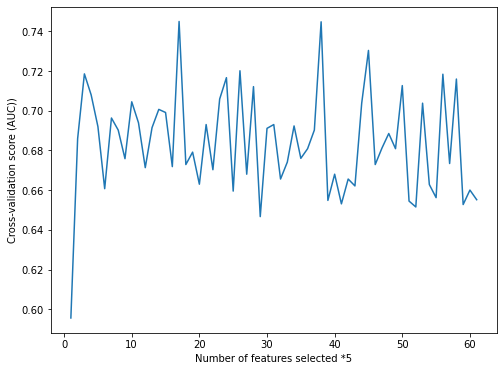

to keep 6 many variables
to delete 294 many variables
Deleteing non important variables ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '81', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '1

In [42]:
clean_data,vars_to_be_deleted=RFE_CV(X_train,y_train,folds=5)

In [44]:
clean_data.head()

,0,80,82,194,199,201
0,-0.098,1.851,-0.380,-0.226,1.716,-0.485
1,1.081,-0.759,0.406,0.083,-2.414,0.003
2,-0.523,0.758,-0.101,-0.500,0.288,-0.738
3,0.067,0.030,1.848,-0.902,1.089,1.020
4,2.347,-0.187,-0.054,0.138,0.084,0.554


In [45]:
#Try logistic regression after removing these 25 columns
modelling_object2 = Modelling(X=clean_data.values,\
                              y=y_train, test_X=test.drop(vars_to_be_deleted+['id'], axis=1).values, skf=skf, N=Number_of_folds)

logit=LogisticRegression(random_state=0, C=0.1,class_weight='balanced',penalty='l1',solver='liblinear')
test_prob_stacked_logreg2,stacker_train_logreg2=modelling_object2.Single_Model(logit)

Train model in fold 1
fold 1 AUC score on VAL is 0.519097
Train model in fold 2
fold 2 AUC score on VAL is 0.673611
Train model in fold 3
fold 3 AUC score on VAL is 0.623264
Train model in fold 4
fold 4 AUC score on VAL is 0.696181
Train model in fold 5
fold 5 AUC score on VAL is 0.500000
Train model in fold 6
fold 6 AUC score on VAL is 0.656250
Train model in fold 7
fold 7 AUC score on VAL is 0.572917
Train model in fold 8
fold 8 AUC score on VAL is 0.677083
Train model in fold 9
fold 9 AUC score on VAL is 0.539931
Train model in fold 10
fold 10 AUC score on VAL is 0.562500
Train model in fold 11
fold 11 AUC score on VAL is 0.687500
Train model in fold 12
fold 12 AUC score on VAL is 0.628472
Train model in fold 13
fold 13 AUC score on VAL is 0.701389
Train model in fold 14
fold 14 AUC score on VAL is 0.508681
Train model in fold 15
fold 15 AUC score on VAL is 0.649306
Train model in fold 16
fold 16 AUC score on VAL is 0.704861
Train model in fold 17
fold 17 AUC score on VAL is 0.62152

In [96]:
results=pd.DataFrame({'id':test['id'],'target':test_prob_stacked_logreg})
results.to_csv('/kaggle/working/test_prob_stacked_logreg.csv',index=False)
from IPython.display import FileLinks
FileLinks('.')

./
  test_prob_stacked_logreg.csv
  __notebook_source__.ipynb